

# 项目：调查TMBd电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本次数据分析选择数据集是tmdb-movies.csv文件，数据集包含了截止到2015年的TMBb电影统计数据，应用python数理统计和绘制可视化图表的方法进行数据分析，来回答：1）每年最受欢迎的电影类别是哪些？  2）票房高的电影有哪些特点？
数据集包含如下21个字段，是2015年上映电影流行度、票房、放映时长、平均评分等数据。包括：
id	imdb_id	popularity	budget	revenue	original_title	cast	homepage	director
tagline	keywords	overview	runtime	genres	production_companies	release_date	vote_count	vote_average
release_year	budget_adj	revenue_adj。
总计共10866行数据，即数据集包含了截止到2015年上映的10866部电影的以上字段的相关数据。

In [1]:
# 对计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’，以便将视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib as mpl
% matplotlib inline

<a id='wrangling'></a>
## 数据整理



### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# 返回数据框维度的元组
df.shape

(10866, 21)

In [4]:
# 返回列的数据类型
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# 显示数据框的简明摘要，
# 包括每列非空值的数量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# 返回每列数据的有效描述性统计
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# 查看每列的索引号和标签
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj




### 数据去重

In [8]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。

# 检查数据中的重复
sum(df.duplicated())

1

In [9]:
# 丢弃重复
df.drop_duplicates(inplace=True)

In [10]:
# 再次检查数据中的重复，确认修改
sum(df.duplicated())

0

<a id='eda'></a>
## 探索性数据分析



### 每年最受欢迎的电影类别是哪些？ 

想了解最受欢迎的电影类别，我们可以通过统计各电影类别的数量，从各类型影片的数量多少的角度，来了解哪些类型的电影较受欢迎。

In [11]:
# 共有多少种独特的电影类别
df['genres'].unique().size

2040

In [12]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。

# 获得各类型电影的数量统计数据
df['genres'].value_counts()

Drama                                              712
Comedy                                             712
Documentary                                        312
Drama|Romance                                      289
Comedy|Drama                                       280
Comedy|Romance                                     268
Horror|Thriller                                    259
Horror                                             253
Comedy|Drama|Romance                               222
Drama|Thriller                                     138
Comedy|Family                                      102
Action|Thriller                                    101
Thriller                                            93
Drama|Comedy                                        92
Animation|Family                                    90
Crime|Drama|Thriller                                81
Crime|Drama                                         74
Comedy|Horror                                       72
Drama|Come

In [13]:
# 因为每个电影有众多类型，我们将类型分离
df_clean = df[df['genres'].notna()]
df_clean = df_clean.drop('genres', axis=1).join(df_clean['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [14]:
# 获得各类型电影的数量统计数据
df_clean['genres'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

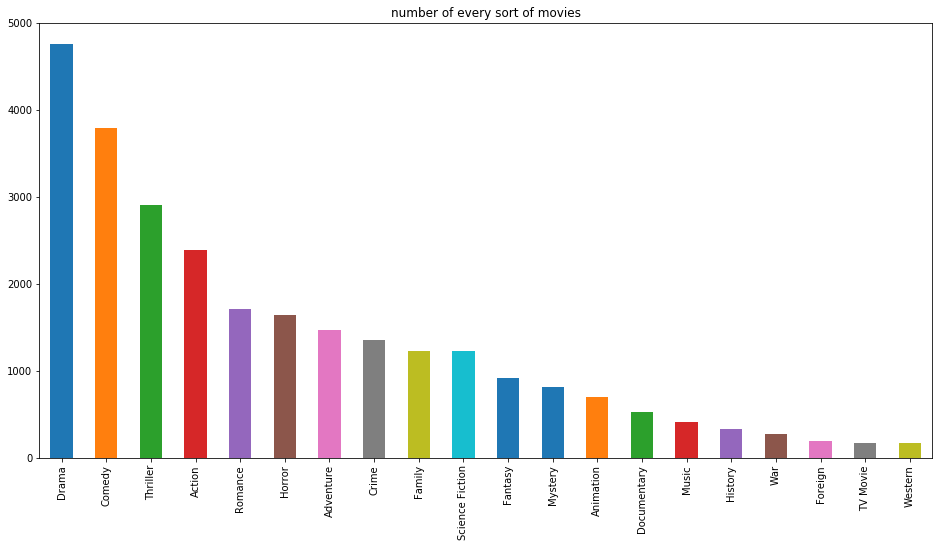

In [15]:
df_clean['genres'].value_counts().plot(x='genres', kind='bar', figsize=(16, 8), title='number of every sort of movies')

应用类型分离后各类型的的电影数量数据，生产上方各类型电影数量直方图，Drama、Comedy、Thriller类型影片数量排名前三。

### 票房高的电影有哪些特点？

想了解票房高的电影具有的特点，我们可以根据现有数据中票房参数和其他参数间的相关性，来了解票房高的电影的特点。下方是研究票房与预算投入相关性，以及票房与平均评分相关性的流程。

In [16]:
# 所有统计电影的平均票房
format(df['revenue'].mean(), '.2f')

'39826896.08'

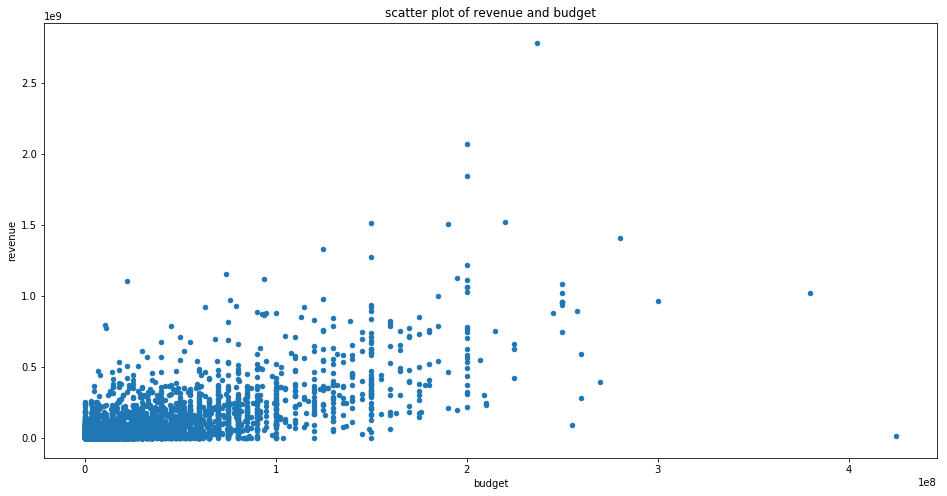

In [17]:
# 请继续探索数据，解决额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。

# 绘制票房与预算之间的关系图
df.plot(x='budget', y='revenue', kind='scatter', figsize = (16, 8), title='scatter plot of revenue and budget')

根据影片的票房和预算数据，生成上方票房与预算之间的关系散点图，可以看出票房在10亿以上的高票房电影，预算绝大部分分布在1亿以上。

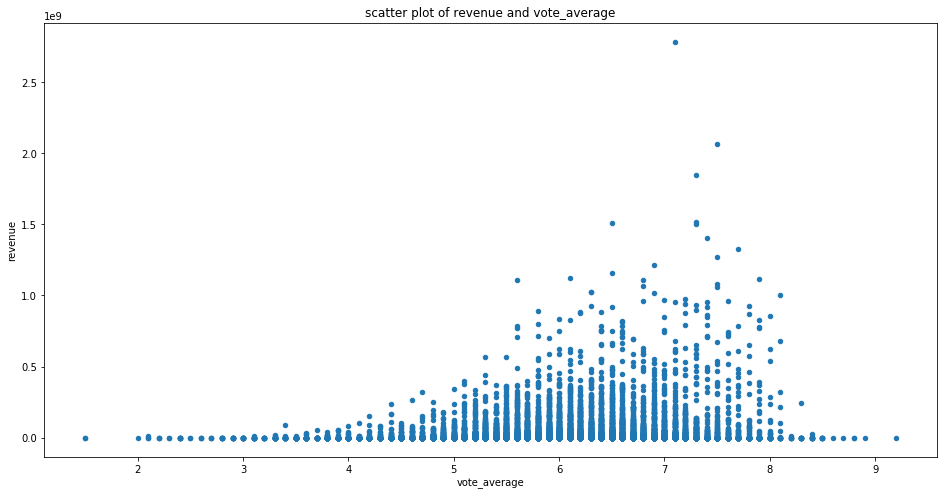

In [18]:
# 绘制票房与平均评分之间的关系图
df.plot(x='vote_average', y='revenue', kind='scatter', figsize = (16, 8), title='scatter plot of revenue and vote_average')

根据影片的票房和平均评分数据，生成上方票房与平均评分之间的关系散点图，票房在10亿以上的高票房电影，平均评分绝大部分分布在6分以上，6到9分之间，5分以下未出现票房超过1亿的电影。

<a id='conclusions'></a>
## 结论



1）在获得根据上面各类型电影的数量统计数据，可以看出:具有Drama标签（剧情、4760部），Comedy标签（喜剧，3793部）和Thriller标签（惊悚，2907部）三种类型标签的电影数量最多，因此从各类型电影数量角度来看，剧情类、喜剧类、惊悚类影片较受青睐。除此之外，还可以从各类型影片的平均评分的角度来考虑各类型电影的受欢迎程度。本次分析主要根据类型电影数量类分析。

2）根据票房与预算之间和的散点关系图，可以看出：票房在10亿以上的高票房电影，预算绝大部分分布在1亿以上，且总体上呈正相关关系。由此可以票房高的电影绝大部分具备预算投入高的特点。

3）根据票房与平均评分之间和的散点关系图，可以看出：票房在10亿以上的高票房电影，平均评分绝大部分分布在6分以上，6到9分之间，5分以下未出现票房超过1亿的电影。由此可以票房高的电影绝大部分具备平均评分较高的特点。